In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train[0].shape

(28, 28)

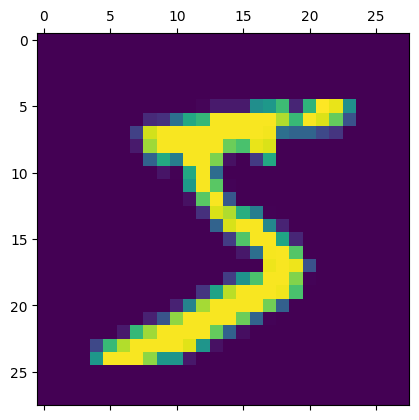

In [8]:
#Matplotlib to see actual digit represented by these 0 to 255 values (0=black, 255=white)
plt.matshow(X_train[0])

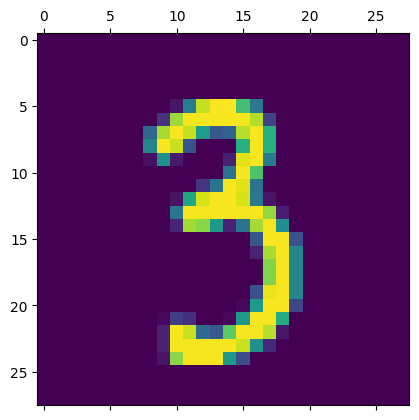

In [9]:
plt.matshow(X_train[98])

In [10]:
y_train[0]

5

In [11]:
y_train[98]

3

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Flattening our input - Converting every digit (2D array) to 1D array

In [13]:
X_train.shape #But we want shape to be (60000,784)

(60000, 28, 28)

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [15]:
#Similarly
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Creating basic NN with one input layer(784) and one ouput layer(10)

In [17]:
model = keras.Sequential([
    keras.layers.Input(shape = (784,)),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7719 - loss: 17.2234
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8758 - loss: 6.0880
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8828 - loss: 5.5415
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8844 - loss: 5.5258
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8876 - loss: 5.2901


In [18]:
#trying with scaled input values - Scaling all the values(0-255) to 0-1
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [21]:
model = keras.Sequential([
    keras.layers.Input(shape = (784,)),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8151 - loss: 0.7120
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9141 - loss: 0.3120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9220 - loss: 0.2812
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9236 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9255 - loss: 0.2677


Evaluate the model

In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9164 - loss: 0.3010


[0.2658591866493225, 0.9266999959945679]

Prediction

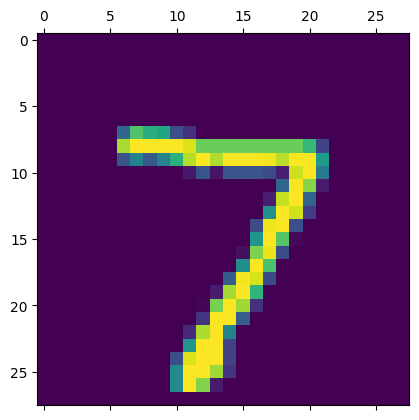

In [23]:
#You cannot display flattened array
#plt.matshow(X_test_flattened[1])

plt.matshow(X_test[0])

In [24]:
y_predict = model.predict(X_test_flattened)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.04702358e-06, 1.14943846e-10, 1.42904519e-05, ...,
        9.93475497e-01, 3.06360453e-05, 3.57681012e-04],
       [8.23590497e-04, 2.25684221e-06, 9.90849733e-01, ...,
        2.93562455e-16, 1.18434444e-04, 9.75908265e-13],
       [2.92425329e-06, 9.77940798e-01, 1.31606217e-02, ...,
        8.24690214e-04, 3.49940266e-03, 2.13495368e-04],
       ...,
       [3.74548215e-08, 4.74249653e-08, 1.35595401e-05, ...,
        2.95279780e-03, 1.58396456e-02, 2.53613889e-02],
       [6.17139733e-07, 9.94311677e-07, 8.41214614e-07, ...,
        1.88879028e-07, 1.07175279e-02, 4.75556078e-07],
       [2.39871883e-06, 1.04707279e-13, 4.41609736e-05, ...,
        2.31956273e-12, 9.26913302e-08, 2.75063472e-10]], dtype=float32)

In [25]:
y_predict[0] #Will print probabilities of all numbers (0-9)

array([8.04702358e-06, 1.14943846e-10, 1.42904519e-05, 6.07754197e-03,
       5.08386279e-07, 3.57242716e-05, 7.32854000e-10, 9.93475497e-01,
       3.06360453e-05, 3.57681012e-04], dtype=float32)

In [26]:
#My method of predicting values
y_predict0= list(y_predict[0])
predicted_val = y_predict0.index(max(y_predict0))
predicted_val

7

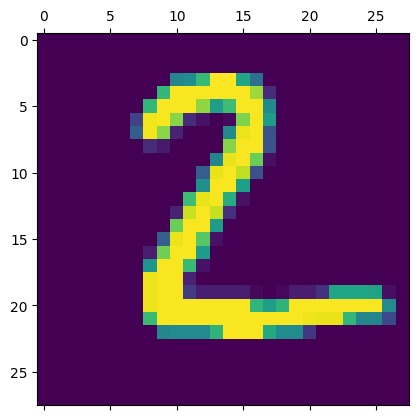

In [27]:
plt.matshow(X_test[1])

In [28]:
y_predict0= list(y_predict[1])
predicted_val = y_predict0.index(max(y_predict0))
predicted_val

2

In [29]:
#All predictions (M1)
predicted_vals = []
for i in range(len(y_predict)):
    prob = y_predict[i]
    prob_list = list(prob)
    value = prob_list.index(max(prob_list))
    predicted_vals.append(value)
print(predicted_vals)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [30]:
#M2 - we can also use argmax function
predicted = []
for i in range(len(y_predict)):
    predicted.append(np.argmax(y_predict[i]))
print(predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [31]:
#Check
print(predicted_vals == predicted)

True


In [32]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
predicted_vals[:5]

[7, 2, 1, 0, 4]

Building a confusion matrix

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = predicted_vals)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    8,  926,   15,    7,    5,   12,    9,   38,    4],
       [   4,    0,   20,  923,    1,   20,    2,   10,   25,    5],
       [   1,    1,    3,    2,  916,    0,   11,    4,   11,   33],
       [  11,    3,    3,   35,    8,  770,   16,    6,   34,    6],
       [  14,    3,    6,    1,    7,   13,  910,    2,    2,    0],
       [   1,    5,   23,    9,    4,    0,    0,  957,    5,   24],
       [   6,    8,    6,   18,    9,   20,   10,   11,  881,    5],
       [  11,    7,    1,   10,   24,    8,    0,   29,   11,  908]])>

Text(50.722222222222214, 0.5, 'Truth')

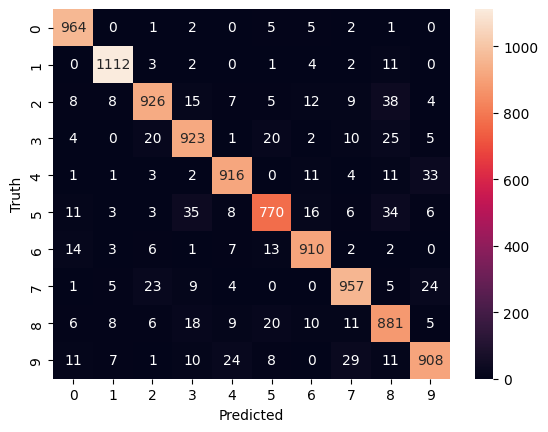

In [35]:
#More visully appealing way
import seaborn as sn
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Adding Hidden Layer(s) - 100->10

In [36]:
model = keras.Sequential([
    keras.layers.Input(shape = (784,)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8740 - loss: 0.4572
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9616 - loss: 0.1333
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9735 - loss: 0.0901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9795 - loss: 0.0698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9849 - loss: 0.0501


In [37]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.0988


[0.08105086535215378, 0.974399983882904]

In [38]:
y_predict1 = model.predict(X_test_flattened)
predicted1 = []
for i in range(len(y_predict1)):
    predicted1.append(np.argmax(y_predict1[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(50.722222222222214, 0.5, 'Truth')

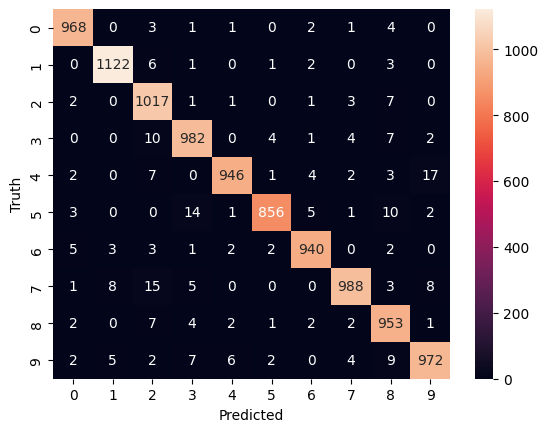

In [39]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions = predicted1)
sn.heatmap(cm1, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Optimizing Neural Network (256->128->64)

In [40]:
model = keras.Sequential([
    keras.layers.Input(shape = (784,)),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8879 - loss: 0.3768
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9718 - loss: 0.0925
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9815 - loss: 0.0600
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9859 - loss: 0.0446
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9885 - loss: 0.0370
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9909 - loss: 0.0296
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9920 - loss: 0.0230
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9927 - loss: 0.0220
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9933 - loss: 0.0210
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9947 - loss: 0.0164
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9958 - loss: 0.0142
Epoch 12/30
1875/187

In [41]:
loss,accuracy = model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.1657


In [42]:
y_predict2 = model.predict(X_test_flattened)
predicted2 = []
for i in range(len(y_predict2)):
    predicted2.append(np.argmax(y_predict2[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(50.722222222222214, 0.5, 'Truth')

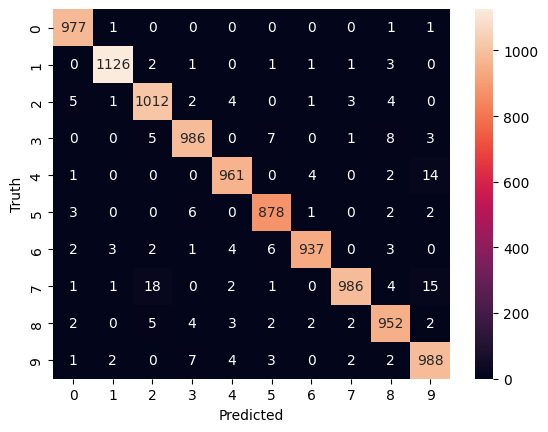

In [43]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions = predicted2)
sn.heatmap(cm2, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [44]:
print("Accuracy of Model :",accuracy*100)
print("Total loss of Model : ",loss)

Accuracy of Model : 98.03000092506409
Total loss of Model :  0.12974821031093597


In [45]:
import pickle

In [46]:
pickle.dump(model, open("ML_model.pkl", "wb"))